In [1]:
%load_ext autoreload
%autoreload 2

import evaluation
import pandas
import os
import visualization as vis
import mir_eval
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

experiments_dir = "../experimenty/"

import common_jupyter

## Vliv diskretizace výšky noty (u výstupu)

In [3]:
paths = [
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_161351-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_165012-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_174655-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm16-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_203237-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0306_010342-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.25-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",
]
attr_names = [
    "Kapacita", "Diskretizace"
]
attributes = [
    ["4x",  "hrubá diskretizace"],
    ["8x",  "hrubá diskretizace"],
    ["16x", "hrubá diskretizace"],
    ["4x",  "jemná diskretizace"],
    ["8x",  "jemná diskretizace"],
    ["16x", "jemná diskretizace"],
]
data = load_data(paths, attributes, attr_names)

Raw Pitch Accuracy  Raw Chroma Accuracy
Kapacita Diskretizace                                               
16x      hrubá diskretizace            0.578821             0.677877
         jemná diskretizace            0.614925             0.713867
4x       hrubá diskretizace            0.538976             0.661353
         jemná diskretizace            0.567332             0.692457
8x       hrubá diskretizace            0.569275             0.677903
         jemná diskretizace            0.598480             0.708347

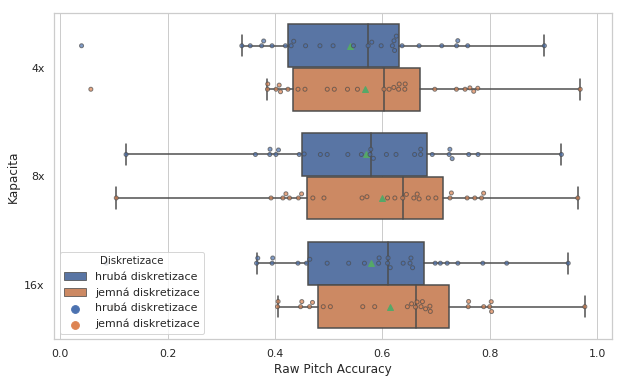

In [4]:
plot_data(data, attr_names)

## Vliv násobného rozlišení první konvoluční vrstvy

In [5]:
paths = [
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/multiresolution/0227_085314-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc2-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/multiresolution/0227_094505-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc3-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/multiresolution/0227_103748-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc4-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/multiresolution/0227_113141-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc5-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/multiresolution/0227_130211-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc6-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/multiresolution/0227_143437-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc7-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/multiresolution/0227_160311-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc8-bps5-as0.25/model-f0-outputs",
]
attr_names = [
    "Rozlišení konvolucí"
]
attributes = [
["512"],
["512,256"],
["512,256,128"],
["512,...,64"],
["512,...,32"],
["512,...,16"],
["512,...,8"],
["512,...,4"],
]
data = load_data(paths, attributes, attr_names)

Raw Pitch Accuracy  Raw Chroma Accuracy
Rozlišení konvolucí                                         
512                            0.598480             0.708347
512,...,16                     0.608043             0.714598
512,...,32                     0.603161             0.708226
512,...,4                      0.603651             0.710390
512,...,64                     0.596989             0.707236
512,...,8                      0.600896             0.708636
512,256                        0.590991             0.702560
512,256,128                    0.597389             0.704302

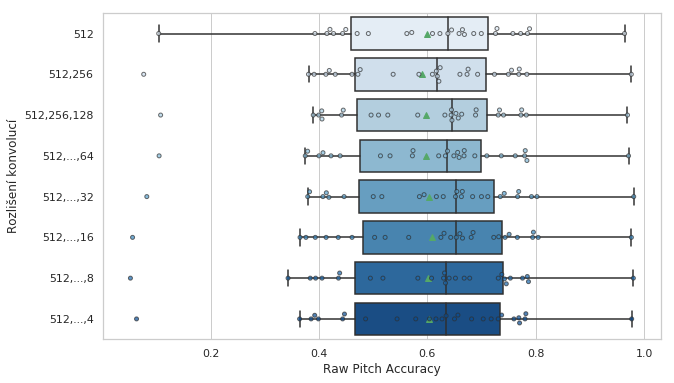

In [6]:
plot_data(data, attr_names)

## Vliv šířky vstupního okna

In [7]:
paths = [
    experiments_dir+"crepe/FINAL/sirka_okna/0226_233744-crepe-dmdb,orchset-bs32-apw1-fw93-cw210-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_003017-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_013427-crepe-dmdb,orchset-bs32-apw1-fw93-cw978-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_025011-crepe-dmdb,orchset-bs32-apw1-fw93-cw2002-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_045758-crepe-dmdb,orchset-bs32-apw1-fw93-cw4050-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs"
]
attr_names = [
    "Šířka vstupního okna"
]
attributes = [
["512 samples"],
["1024 samples"],
["2048 samples"],
["4096 samples"],
["8192 samples"],
]
data = load_data(paths, attributes, attr_names)

Raw Pitch Accuracy  Raw Chroma Accuracy
Šířka vstupního okna                                         
1024 samples                    0.593082             0.703298
2048 samples                    0.598599             0.703688
4096 samples                    0.592061             0.696918
512 samples                     0.583743             0.696000
8192 samples                    0.616243             0.702662

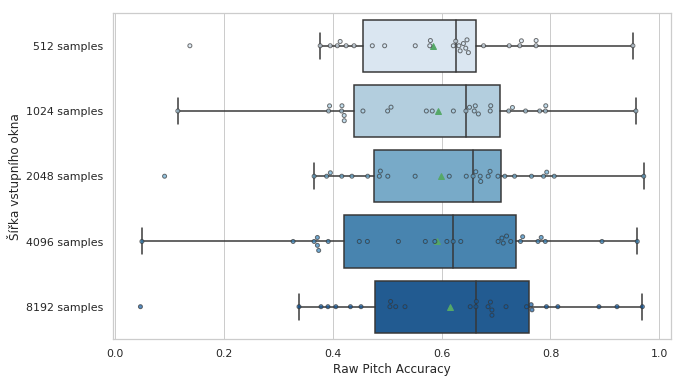

In [8]:
plot_data(data, attr_names)

## Vliv zmírnění váhy chybné estimace na konečný loss

In [9]:
paths = [
    experiments_dir+"./crepe/FINAL/miss_weight/0301_133936-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc6-bps5-as0.25-mw0.05/model-f0-outputs",
    experiments_dir+"./crepe/FINAL/miss_weight/0301_153037-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc6-bps5-as0.25-mw0.5/model-f0-outputs",
    experiments_dir+"./crepe/FINAL/multiresolution/0227_130211-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc6-bps5-as0.25/model-f0-outputs",
]
attr_names = [
    "Váha chyby estimace"
]
attributes = [
["5%"],
["50%"],
["100%"],
]
data = load_data(paths, attributes, attr_names)

Raw Pitch Accuracy  Raw Chroma Accuracy
Váha chyby estimace                                         
100%                           0.608043             0.714598
5%                             0.556781             0.697656
50%                            0.605961             0.709062

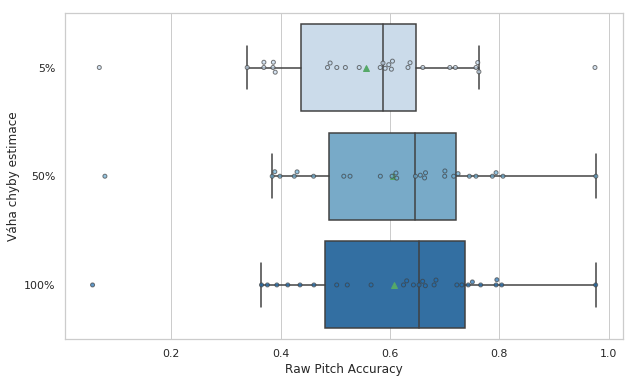

In [10]:
plot_data(data, attr_names)

## Srovnání několikrát přetrénovaných sítí se stejnými parametry

V první sadě se experimenty liší v learning rate, jinak jsou oba trénované stejnou dobu na stejných datech.
- lr=0.001 vs lr=0.0002

V druhé sadě byly modely trénovány různou dobu
- 200k iterací vs 400k iterací s batchsize 32

In [11]:
paths = [
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_225437-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm16-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0306_010342-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.25-mw1.0-cm16-mc0-vsFalse-flc1/model-f0-outputs",
    experiments_dir+"crepe/FINAL/sirka_okna/0227_003017-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25/model-f0-outputs",
    experiments_dir+"crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1/model-f0-outputs",
]
attr_names = [
    "Sada", "Číslo"
]
attributes = [
["první", "1."],
["první", "2."],
["druhá", "1."],
["druhá", "2."],
]
data = load_data(paths, attributes, attr_names)

Raw Pitch Accuracy  Raw Chroma Accuracy
Sada  Číslo                                         
druhá 1.               0.593082             0.703298
      2.               0.598480             0.708347
první 1.               0.598811             0.708911
      2.               0.614925             0.713867

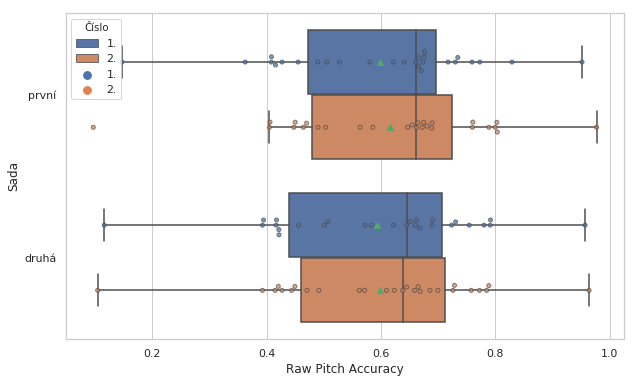

In [12]:
plot_data(data, attr_names)